# The Sparks Foundation - Data Science & Business Analytics Internship 

## Task 1 - Prediction using Supervised Machine Learning

#### __AIM :__ Predict percentage of student based on number of Study Hours

## AUTHOR: Swati Singhal

### Importing libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print("Libraries imported Successfully")

Libraries imported Successfully


In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Dataset imported Successfully")

Dataset imported Successfully


In [3]:
#Displaying first 5 rows of dataset in order to observe and determine variables.
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Determining nature of variables(Categorical or Continous)
data.dtypes


Hours     float64
Scores      int64
dtype: object

In [5]:
#Finding Number of rows and columns
data.shape

(25, 2)

In [6]:
#Checking if there is any missing value present by comparing count and shape of dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# Finding missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

##### Found no missing value. 

### Visualizing the Dataset

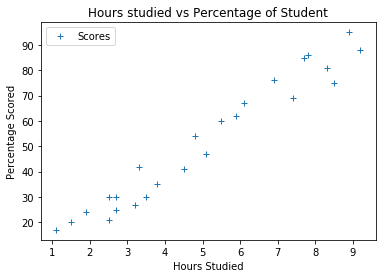

In [8]:
#Plotting the DataSet
data.plot(x ="Hours", y = "Scores", style = "+")
plt.title("Hours studied vs Percentage of Student")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.show()

##### From the graph above, we can clearly see that there is a positive coorelation between number of hours studied and percentage of score. So we can use Linear Regression Supervised Machine Learning model to train and predict values in model

### Preparing the data

In [9]:
#Splitting data into attributes and labels ie input and output respectively
x = data.iloc[:, :-1].values
y = data.iloc[:,1].values

In [10]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

##### Training and testing sets

In [12]:
#Splitting data into training and testing data sets using SciKit-Learn's built in method train_test_split() method
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0)

##### Training the model

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print("Training completed successfully")


Training completed successfully


##### Plotting regression line

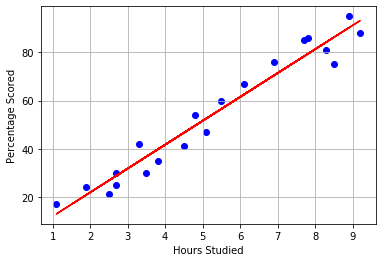

In [14]:
line = regressor.coef_ * x + regressor.intercept_
plt.scatter(x_train, y_train, color = "blue")
plt.plot(x, line, color = "red")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.grid()
plt.show()

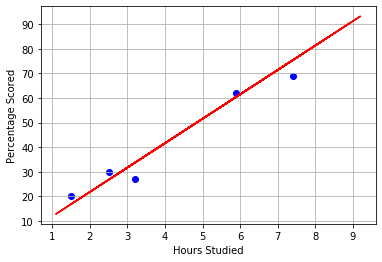

In [15]:
line = regressor.coef_ * x + regressor.intercept_
plt.scatter(x_test, y_test, color = "blue")
plt.plot(x, line, color = "red")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.grid()
plt.show()

### Making Predictions

In [16]:
print(x_test)
y_pred = regressor.predict(x_test)


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [18]:
#comparing actual and predicted values
df = pd.DataFrame({"Actual" :y_test, "Predicted": y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Evaluating model using Mean Square Error

In [19]:
from sklearn import metrics  

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


### Task: What will be the Score if Student Studied 9.25hrs a day?

In [20]:
hours = [[9.25]]
pred_value = regressor.predict(hours)
print('Number of hours : {}'.format(hours))
print('Predicted Score : {}'.format(pred_value[0]))

Number of hours : [[9.25]]
Predicted Score : 93.69173248737538


### Conclusion:


### A student who studies for 9.25 hrs a day might get a predicted score of 9.69